In [26]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

In [27]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [28]:
# Set the location and name of the cfg file
cfg_file = './cfg/yolov3.cfg'

# Set the location and name of the pre-trained weights file
weight_file = './weights/yolov3_weights.weights'

# Set the location and name of the COCO object classes file
namesfile = 'data/coco.names'

# Load the network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the COCO object classes
class_names = load_class_names(namesfile)

In [29]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1



It took 1.209 seconds to detect the objects in the image.

Number of Objects Detected: 28 

Objects Found and Confidence Level:

1. person: 0.999996
2. person: 1.000000
3. car: 0.707237
4. truck: 0.933031
5. car: 0.658084
6. truck: 0.666981
7. person: 1.000000
8. traffic light: 1.000000
9. person: 1.000000
10. car: 0.997369
11. bus: 0.998023
12. person: 1.000000
13. person: 1.000000
14. person: 1.000000
15. person: 1.000000
16. person: 1.000000
17. traffic light: 1.000000
18. traffic light: 1.000000
19. handbag: 0.997282
20. traffic light: 1.000000
21. car: 0.989741
22. traffic light: 1.000000
23. traffic light: 0.999999
24. person: 0.999999
25. truck: 0.715036
26. traffic light: 1.000000
27. person: 0.999993
28. person: 0.999996


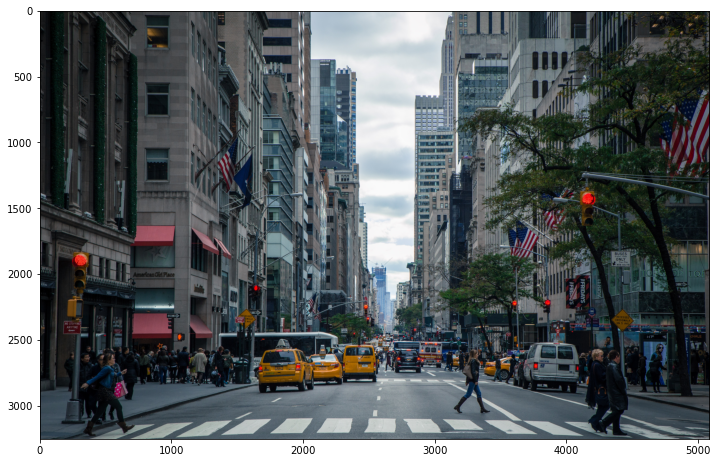

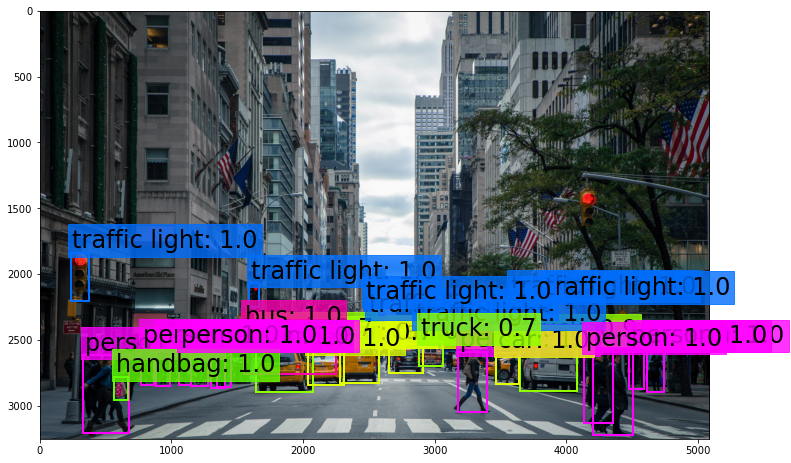

In [30]:
# Set the NMS threshold
nms_thresh = 0.6  
# Set the IOU threshold
iou_thresh = 0.4

# Set the default figure size
plt.rcParams['figure.figsize'] = [12.0, 10.0]

# Load the image
img = cv2.imread('./images/city_scene.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(original_image)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)